# PeliminarTP3

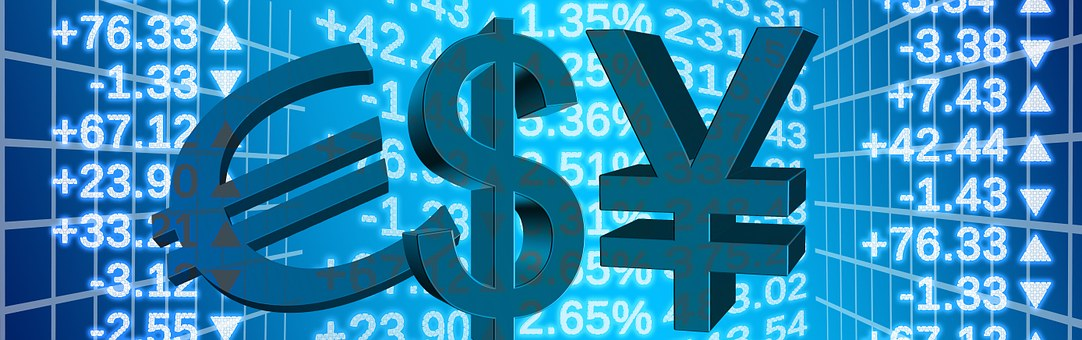

In [14]:
from IPython.display import Image
Image(filename='../imagenStock.jpg' ,  width= 1280)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sb

### Carga del dataset

In [16]:
df = pd.read_csv("../dataset.csv", index_col=0, parse_dates=True, dayfirst= True)
df.head()

,MERV,BVSP,GSPC,NDX,FTSE,GDAXI,FCHI,N225,HSI,SSEC,BSESN,DEXARUS,DEXBZUS,DEXUSUK,DEXUSEU,DEXJPUS,DEXHKUS,DEXCHUS,DEXINUS,DOLAR_BLUE
FECHA,,,,,,,,,,,,,,,,,,,,
1997-07-02,824.109985,13260.0,904.030029,975.929993,4751.399902,3867.530029,2909.500000,20196.41992,NaN,1199.06,4333.899902,0.9998,1.0767,1.6670,1.1223,114.52,7.7472,8.3210,35.80,NaN
1997-07-03,831.440002,13285.0,916.919983,986.520020,4831.700195,3939.729980,2937.000000,20121.41016,15055.70020,1150.62,4323.459961,0.9994,1.0778,1.6885,1.1242,113.46,7.7445,8.3214,35.79,NaN
1997-07-04,837.950012,13494.0,NaN,NaN,4812.799805,3946.729980,2934.500000,19968.00000,14823.00000,1159.34,4323.819824,0.9995,NaN,NaN,1.1230,NaN,NaN,NaN,NaN,NaN
1997-07-07,841.690002,13502.0,912.200012,991.039978,4810.700195,4003.350098,2947.699951,19705.16992,14858.59961,1096.82,4291.450195,0.9998,1.0779,1.6870,1.1226,112.60,7.7428,8.3218,35.82,NaN
1997-07-08,846.330017,13617.0,918.750000,1005.809998,4758.500000,4030.100098,2929.800049,19853.89063,14792.20020,1109.67,4306.390137,0.9999,1.0790,1.6885,1.1180,112.76,7.7436,8.3219,35.80,NaN


In [17]:
# Primero agregamos las columnas que indican, el año, mes y dia de la semana al que pertenece cada observación.

df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday'] = df.index.day_name()

In [18]:
# Eliminamos todas las observaciones pertenecientes a ls días Sábados o Domingos

df.drop(df[df.Weekday == 'Saturday'].index, inplace= True)
df.drop(df[df.Weekday == 'Sunday'].index, inplace= True)

# para verificar que se eliminaron todas las observaciones pertenecientes a sabado y domingo: 
sum(df.Weekday == 'Saturday') + sum(df.Weekday == 'Sunday')


0

In [19]:
#spline
df2 = df.interpolate(method='spline', order=1, limit_direction='both')
df2

,MERV,BVSP,GSPC,NDX,FTSE,GDAXI,FCHI,N225,HSI,SSEC,...,DEXUSUK,DEXUSEU,DEXJPUS,DEXHKUS,DEXCHUS,DEXINUS,DOLAR_BLUE,Year,Month,Weekday
FECHA,,,,,,,,,,,,,,,,,,,,,
1997-07-02,824.109985,13260.0,904.030029,975.929993,4751.399902,3867.530029,2909.500000,20196.419920,15288.12315,1199.060000,...,1.66700,1.1223,114.520000,7.747200,8.321000,35.800000,-36.770539,1997,7,Wednesday
1997-07-03,831.440002,13285.0,916.919983,986.520020,4831.700195,3939.729980,2937.000000,20121.410160,15055.70020,1150.620000,...,1.68850,1.1242,113.460000,7.744500,8.321400,35.790000,-36.762752,1997,7,Thursday
1997-07-04,837.950012,13494.0,915.711121,987.645566,4812.799805,3946.729980,2934.500000,19968.000000,14823.00000,1159.340000,...,1.74917,1.1230,113.515935,7.769796,8.562043,36.031773,-36.754965,1997,7,Friday
1997-07-07,841.690002,13502.0,912.200012,991.039978,4810.700195,4003.350098,2947.699951,19705.169920,14858.59961,1096.820000,...,1.68700,1.1226,112.600000,7.742800,8.321800,35.820000,-36.731604,1997,7,Monday
1997-07-08,846.330017,13617.0,918.750000,1005.809998,4758.500000,4030.100098,2929.800049,19853.890630,14792.20020,1109.670000,...,1.68850,1.1180,112.760000,7.743600,8.321900,35.800000,-36.723817,1997,7,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-04,32387.279300,78876.0,2842.739990,8834.110352,5753.799805,10466.799810,4378.229980,19647.470067,23613.80078,2872.055555,...,1.24300,1.0908,106.820000,7.753200,7.062200,75.184169,110.000000,2020,5,Monday
2020-05-05,33546.519530,79471.0,2868.439941,8930.620117,5849.399902,10729.459960,4483.129883,19656.640522,23868.66016,2875.072759,...,1.24490,1.0840,106.520000,7.753400,7.062200,75.200761,110.000000,2020,5,Tuesday
2020-05-06,34158.890630,79064.0,2848.419922,8984.860352,5853.799805,10606.200200,4433.379883,19665.810977,24137.48047,2878.140000,...,1.23470,1.0795,106.070000,7.752000,7.103100,75.217354,112.000000,2020,5,Wednesday


In [20]:
# Verificación de que ya no hay más NAs
df2.isnull().sum()

MERV          0
BVSP          0
GSPC          0
NDX           0
FTSE          0
GDAXI         0
FCHI          0
N225          0
HSI           0
SSEC          0
BSESN         0
DEXARUS       0
DEXBZUS       0
DEXUSUK       0
DEXUSEU       0
DEXJPUS       0
DEXHKUS       0
DEXCHUS       0
DEXINUS       0
DOLAR_BLUE    0
Year          0
Month         0
Weekday       0
dtype: int64

In [21]:
# Correción de tipo de cambio de Argentina
# Agregamos la columna DEXARUS_FIX con el valor corregido para los períodos mencionados

# 1-  Copiamos el valor de DEXARUS a la nueva columna DEXARUS_FIX
df2['DEXARUS_FIX'] = df2.DEXARUS

# 2- Sobreescribimos los valores con DOLAR_BLUE para el período 28/10/2011 a 16/12/2015
for index, row in df2.loc['2011-10-28':'2015-12-16'].iterrows():
  df2.loc[index, 'DEXARUS_FIX'] = row['DOLAR_BLUE']

# 3- Sobreescribimos los valores con DOLAR_BLUE para el período 01/09/2019 a 08/05/2020
for index, row in df2.loc['2015-12-16':'2020-05-08'].iterrows():
  df2.loc[index, 'DEXARUS_FIX'] = row['DOLAR_BLUE']

# test
# df2.loc['2011-10-28':'2015-12-16']

In [22]:
#Expresión de todos los índices en dólares estadounidenses
df_usd = df2.copy()

for index, row in df_usd.iterrows():
  df_usd.loc[index, 'MERV'] = row['MERV'] / row['DEXARUS_FIX']
  df_usd.loc[index, 'BVSP'] = row['BVSP'] / row['DEXBZUS']
  df_usd.loc[index, 'FTSE'] = row['FTSE'] * row['DEXUSUK']
  df_usd.loc[index, 'GDAXI'] = row['GDAXI'] * row['DEXUSEU']
  df_usd.loc[index, 'FCHI'] = row['FCHI'] * row['DEXUSEU']
  df_usd.loc[index, 'N225'] = row['N225'] / row['DEXJPUS']
  df_usd.loc[index, 'HSI'] = row['HSI'] / row['DEXHKUS']
  df_usd.loc[index, 'SSEC'] = row['SSEC'] / row['DEXCHUS']
  df_usd.loc[index, 'BSESN'] = row['BSESN'] / row['DEXINUS'] 

df_usd = df_usd.drop(['DEXARUS', 'DEXBZUS', 'DEXUSUK', 'DEXUSEU', 'DEXJPUS', 'DEXHKUS', 'DEXCHUS',	'DOLAR_BLUE', 'DEXARUS_FIX', 'DEXINUS'], axis=1)

# test
df_usd.loc['2019-01-01':'2019-05-01']

,MERV,BVSP,GSPC,NDX,FTSE,GDAXI,FCHI,N225,HSI,SSEC,BSESN,Year,Month,Weekday
FECHA,,,,,,,,,,,,,,
2019-01-01,629.246942,28002.274666,2508.013937,6344.952167,9735.333337,12123.804209,5399.427966,180.366497,3273.188430,397.761500,506.971996,2019,1,Tuesday
2019-01-02,632.127827,23873.252367,2510.030029,6360.870117,8483.745406,12001.110005,5319.175232,180.288936,3207.447302,359.387437,504.874378,2019,1,Wednesday
2019-01-03,631.097960,24463.384007,2447.889893,6147.129883,8454.888156,11868.742586,5254.331973,181.610813,3200.740586,358.671479,498.718030,2019,1,Thursday
2019-01-04,655.842625,24722.334383,2531.939941,6422.669922,8710.847475,12269.783245,5397.948373,180.644205,3271.171358,366.262762,506.301523,2019,1,Friday
2019-01-07,668.970158,24716.711590,2549.689941,6488.250000,8688.665005,12334.186263,5415.719402,184.486933,3297.556954,369.788762,503.301420,2019,1,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-25,561.673896,24360.287625,2926.169922,7816.919922,9590.732536,13672.989886,6186.798157,199.906623,3767.329294,463.352517,553.139951,2019,4,Thursday
2019-04-26,569.789021,24533.102200,2939.879883,7826.680176,9604.662852,13730.193836,6209.279311,199.450990,3774.560424,458.725959,553.204873,2019,4,Friday
2019-04-29,546.552222,24436.766424,2943.030029,7839.040039,9616.360932,13790.122646,6242.884206,198.277067,3811.302855,454.835739,555.340365,2019,4,Monday


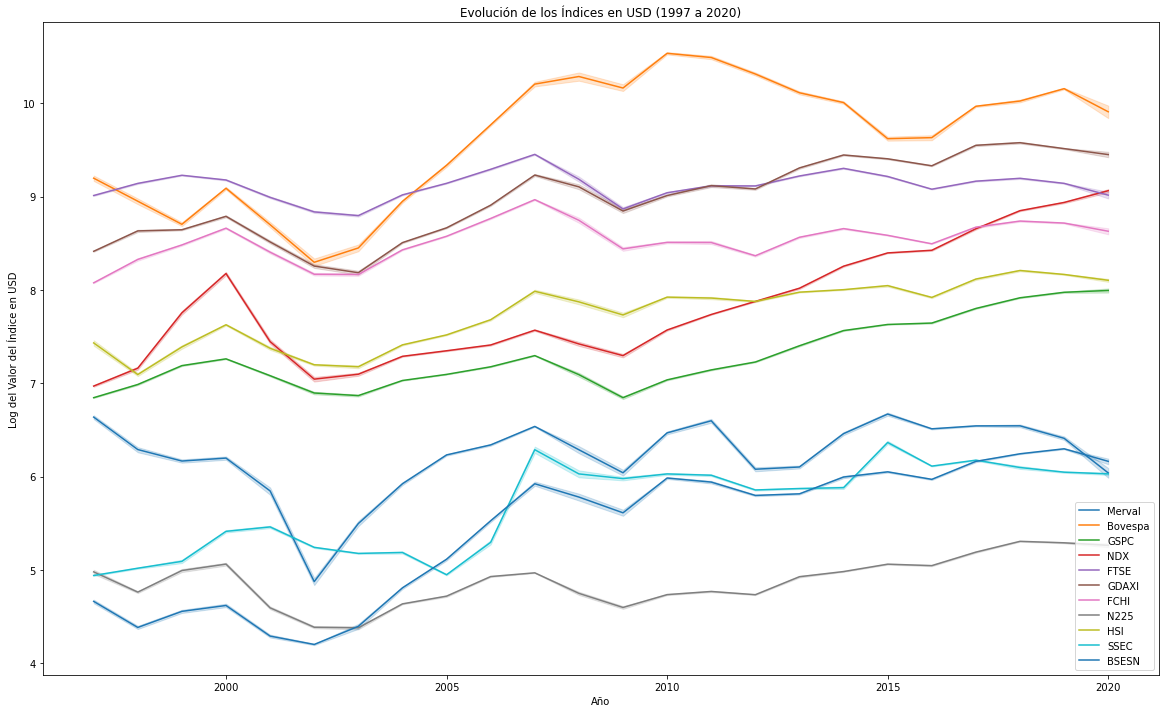

In [23]:
# Transformación log
df_ln = df_usd.copy()

df_ln['MERV'] = np.log(df_usd['MERV'])
df_ln['BVSP'] = np.log(df_usd['BVSP'])
df_ln['GSPC'] = np.log(df2['GSPC'])
df_ln['NDX'] = np.log(df2['NDX'])
df_ln['FTSE'] = np.log(df_usd['FTSE'])
df_ln['GDAXI'] = np.log(df_usd['GDAXI'])
df_ln['FCHI'] = np.log(df_usd['FCHI'])
df_ln['N225'] = np.log(df_usd['N225'])
df_ln['HSI'] = np.log(df_usd['HSI'])
df_ln['SSEC'] = np.log(df_usd['SSEC'])
df_ln['BSESN'] = np.log(df_usd['BSESN'])


plt.figure(figsize=(20,12))

sb.lineplot(data = df_ln, x= 'Year', y='MERV', label = "Merval")
sb.lineplot(data = df_ln, x= 'Year', y='BVSP', label = "Bovespa")
sb.lineplot(data = df_ln, x= 'Year', y='GSPC', label = "GSPC")
sb.lineplot(data = df_ln, x= 'Year', y='NDX', label = "NDX")
sb.lineplot(data = df_ln, x= 'Year', y='FTSE', label = "FTSE")
sb.lineplot(data = df_ln, x= 'Year', y='GDAXI', label = "GDAXI")
sb.lineplot(data = df_ln, x= 'Year', y='FCHI', label = "FCHI")
sb.lineplot(data = df_ln, x= 'Year', y='N225', label = "N225")
sb.lineplot(data = df_ln, x= 'Year', y='HSI', label = "HSI")
sb.lineplot(data = df_ln, x= 'Year', y='SSEC', label = "SSEC")
sb.lineplot(data = df_ln, x= 'Year', y='BSESN', label = "BSESN")
plt.title('Evolución de los Índices en USD (1997 a 2020)')
plt.xlabel('Año')
plt.ylabel('Log del Valor del Índice en USD')
plt.legend()

In [24]:
# Rendimiento de los índices en dólares

df_rend = df_usd.copy()

# Atraso todos los índices un periodo

df_rend['MERV1'] = df_usd[['MERV']].shift(periods=1, axis=0)
df_rend['BVSP1'] = df_usd[['BVSP']].shift(periods=1, axis=0)
df_rend['GSPC1'] = df_usd[['GSPC']].shift(periods=1, axis=0)
df_rend['NDX1'] = df_usd[['NDX']].shift(periods=1, axis=0)
df_rend['FTSE1'] = df_usd[['FTSE']].shift(periods=1, axis=0)
df_rend['GDAXI1'] = df_usd[['GDAXI']].shift(periods=1, axis=0)
df_rend['FCHI1'] = df_usd[['FCHI']].shift(periods=1, axis=0)
df_rend['N2251'] = df_usd[['N225']].shift(periods=1, axis=0)
df_rend['HSI1'] = df_usd[['HSI']].shift(periods=1, axis=0)
df_rend['SSEC1'] = df_usd[['SSEC']].shift(periods=1, axis=0)
df_rend['BSESN1'] = df_usd[['BSESN']].shift(periods=1, axis=0)

# Rendimiento diario en dólares de cada índice

df_rend['MERV_diario'] = ((df_rend.MERV - df_rend.MERV1) / df_rend.MERV1) * 100
df_rend['BVSP_diario'] = ((df_rend.BVSP - df_rend.BVSP1) / df_rend.BVSP1) * 100
df_rend['GSPC_diario'] = ((df_rend.GSPC - df_rend.GSPC1) / df_rend.GSPC1) * 100
df_rend['NDX_diario'] = ((df_rend.NDX - df_rend.NDX1) / df_rend.NDX1) * 100
df_rend['FTSE_diario'] = ((df_rend.FTSE - df_rend.FTSE1) / df_rend.FTSE1) * 100
df_rend['GDAXI_diario'] = ((df_rend.GDAXI - df_rend.GDAXI1) / df_rend.GDAXI1) * 100
df_rend['FCHI_diario'] = ((df_rend.FCHI - df_rend.FCHI1) / df_rend.FCHI1) * 100
df_rend['N225_diario'] = ((df_rend.N225 - df_rend.N2251) / df_rend.N2251) * 100
df_rend['HSI_diario'] = ((df_rend.HSI - df_rend.HSI1) / df_rend.HSI1) * 100
df_rend['SSEC_diario'] = ((df_rend.SSEC - df_rend.SSEC1) / df_rend.SSEC1) * 100
df_rend['BSESN_diario'] = ((df_rend.BSESN - df_rend.BSESN1) / df_rend.BSESN1) * 100


df_rend_diario = df_rend.drop(['MERV','BVSP','GSPC','NDX','FTSE','GDAXI','FCHI','N225','HSI','SSEC','BSESN','Month',
                               'MERV1','BVSP1','GSPC1','NDX1','FTSE1','GDAXI1','HSI1','FCHI1','N2251','SSEC1','BSESN1'], axis=1)
df_rend_diario

,Year,Weekday,MERV_diario,BVSP_diario,GSPC_diario,NDX_diario,FTSE_diario,GDAXI_diario,FCHI_diario,N225_diario,HSI_diario,SSEC_diario,BSESN_diario
FECHA,,,,,,,,,,,,,
1997-07-02,1997,Wednesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-07-03,1997,Thursday,0.929826,0.086285,1.425833,1.085122,3.001574,2.039279,1.116075,0.559379,-1.485951,-4.044444,-0.213017
1997-07-04,1997,Friday,0.772897,-31.055785,-0.131839,0.114093,3.187888,0.070745,-0.191773,-0.811322,-1.866134,-2.074027,-0.662731
1997-07-07,1997,Monday,0.416186,47.400318,-0.383430,0.343687,-3.596321,1.398478,0.414040,-0.513522,0.589664,-2.661495,-0.161848
1997-07-08,1997,Tuesday,0.541217,0.748911,0.718043,1.490356,-0.997135,0.255689,-1.014525,0.611764,-0.457160,1.170353,0.404193
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-04,2020,Monday,-2.619989,-3.039523,0.424983,1.329758,-0.791903,-3.437021,-3.899993,0.087080,-2.568874,0.316158,-4.582589
2020-05-05,2020,Tuesday,3.579307,0.919184,0.904056,1.092467,1.816908,1.870420,1.757611,0.328444,1.076674,0.105054,-0.847475
2020-05-06,2020,Wednesday,0.007127,-2.570277,-0.697941,0.607351,-0.744739,-1.559158,-1.520238,0.471099,1.144511,-0.469735,0.716138


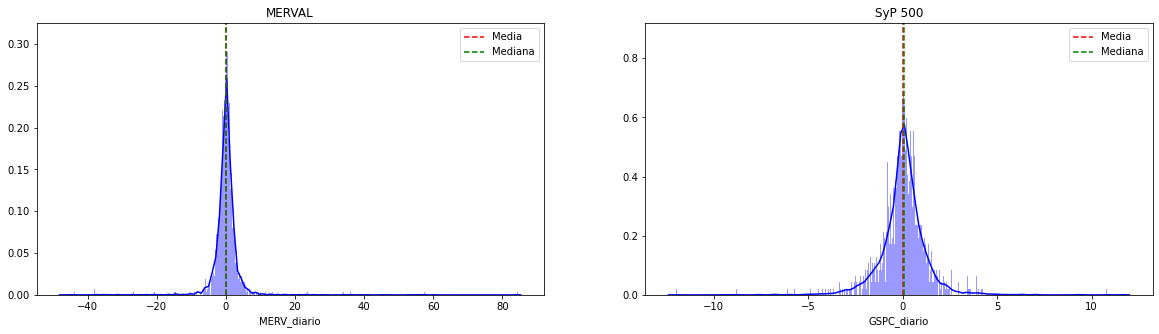

In [27]:
plt.figure(figsize= (20,5))

plt.subplot(121)
sb.distplot(df_rend_diario.MERV_diario, kde= True, bins= 3000, color ="blue")
plt.axvline(df_rend_diario.MERV_diario.mean(), color = "red", linestyle = 'dashed', linewidth= 1.5, label = 'Media')
plt.axvline(df_rend_diario.MERV_diario.median(), color = "green", linestyle = 'dashed', linewidth= 1.5, label = 'Mediana')
plt.title('MERVAL')
plt.legend()

plt.subplot(122)
sb.distplot(df_rend_diario.GSPC_diario, kde= True, bins= 3000, color ="blue")
plt.axvline(df_rend_diario.GSPC_diario.mean(), color = "red", linestyle = 'dashed', linewidth= 1.5, label = 'Media')
plt.axvline(df_rend_diario.GSPC_diario.median(), color = "green", linestyle = 'dashed', linewidth= 1.5, label = 'Mediana')
plt.title('SyP 500')
plt.legend()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92]),
 <a list of 93 Text major ticklabel objects>)

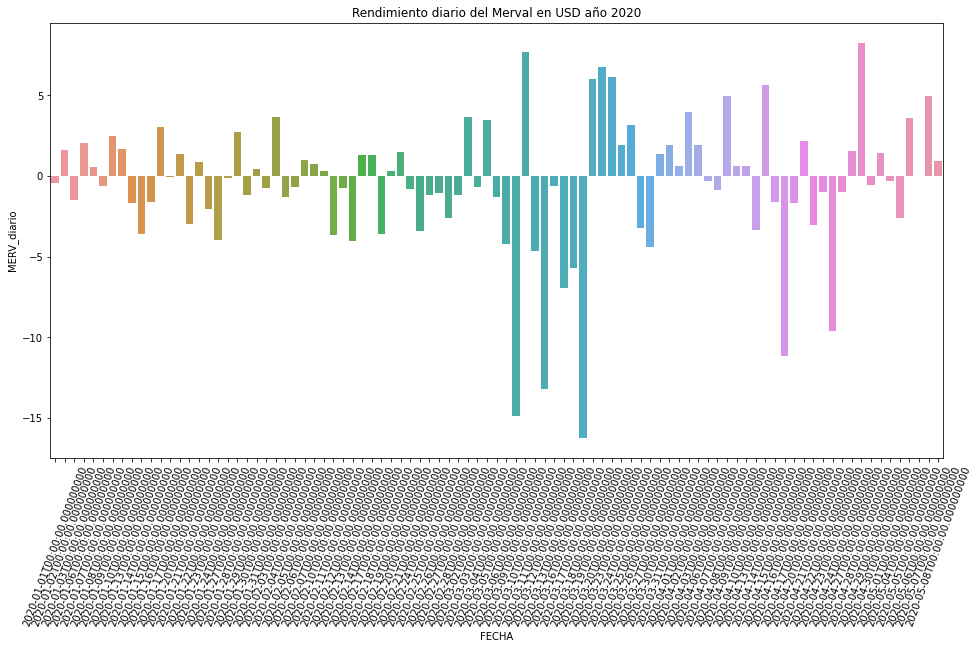

In [26]:
# Gráfico del rendimiento diario del Merval en el 2020

merval = df_rend_diario.iloc[:, [0,2]]
merval = merval[merval['Year'] == 2020]

plt.figure(figsize= (16,8))
sb.barplot(data = merval, x = merval.index, y = 'MERV_diario')
plt.title('Rendimiento diario del Merval en USD año 2020')
plt.xticks(rotation= 70)

# Trabajo Práctico N°3: Introducción al Aprendizaje Automático

## Introducción

En los prácticos 1 y 2 se analizaron las series originales y se les realizaron diversas transformaciones.
A partir de las series preprocesadas, en este práctico se persigue el objetivo general de  es entrenar algunos modelos predictivos relativamente sencillos y luego comparar su desempeño. 



## Consignas


A partir de las series transformadas, se proponen las siguientes actividades orientadoras, sin perjuicio de que se puedan incorporar análisis adicionales:

#### **Dividir el dataset en los conjutos de entrenamiento y test**
  

*   Eliminar los fines de semana.
*   Imputar los faltantes debidos a feriados usando un algoritmo adecuado para series temporales, por ejemplo splines..